<a href="https://colab.research.google.com/github/Sarthik-mehta/Digital-Electric-Meter-Reading-Model-Based-on-Image-Processing/blob/main/MeterReadingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing necessary libraries
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 9.1 kB/s 


In [2]:
#Importing the required libraries
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imutils
import easyocr

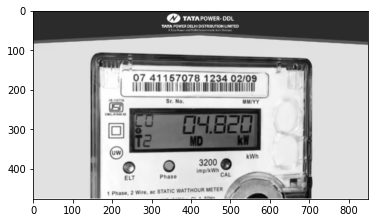

In [3]:
img = cv2.imread('/content/Tata-Power-DDL.jpg')
if img is not None:
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
  

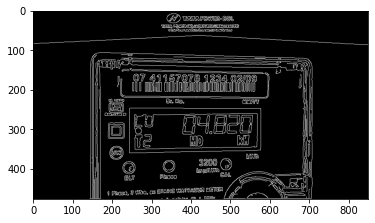

In [4]:
#Noise reduction 1 17 17
bfilter = cv2.bilateralFilter(gray, 1, 17, 17) 
#Edge detection 30 200
edged = cv2.Canny(bfilter, 30, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [7]:
#finding contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [11]:
#find exact location of screen
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[244, 248]],

       [[244, 360]],

       [[576, 353]],

       [[576, 248]]], dtype=int32)

In [12]:
#Masking the original image
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

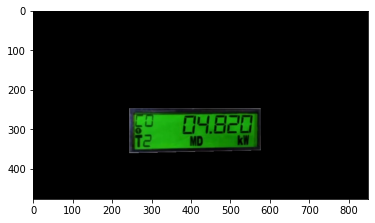

In [13]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [15]:
#Cropping the display region
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

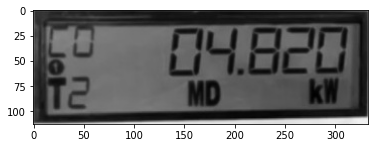

In [16]:
  plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [17]:
from google.colab.patches import cv2_imshow

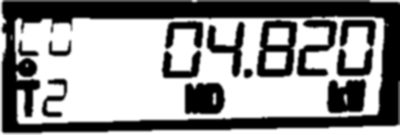

In [18]:
#series of morphological operations to cleanup the thresholded image
image1=cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
image2 = imutils.resize(image1, width=400)
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
thresh = 255 - cv2.GaussianBlur(thresh, (5,5), 0)
cv2_imshow(thresh)

In [19]:
reader = easyocr.Reader(['en'])
result = reader.readtext(thresh,allowlist = '.0123456789')
val=0
reading=0
#filtering out the main reading
for i,j,k in result:
  if len(j)>val:
    reading=j
    val=len(j)

print("The predicted reading is: ",reading)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


The predicted reading is:  04.820
